In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

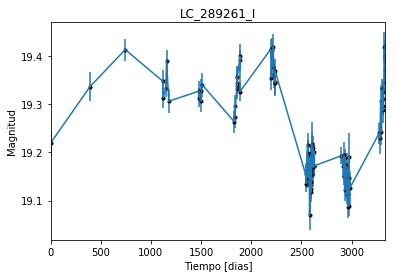

In [2]:
data = np.genfromtxt('LC_289261_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_289261_I')
plt.savefig("LC_289261_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

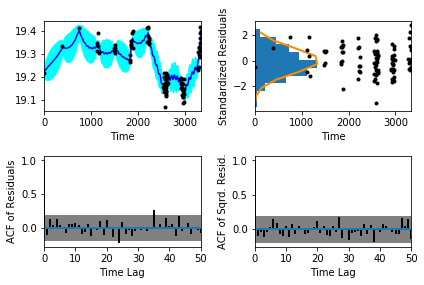

In [5]:
sample.assess_fit()

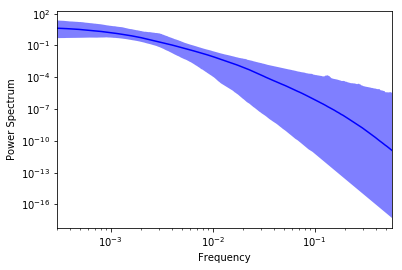

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

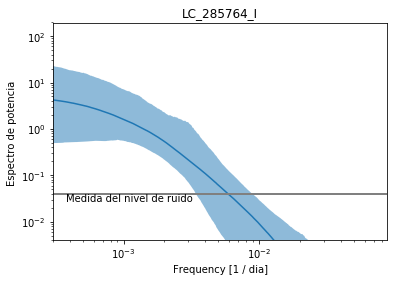

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_285764_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_285764_I')

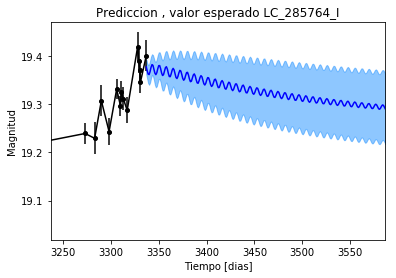

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_285764_I')

Text(0.5,1,'Prediccion, Caminos simulados_LC_285764_I')

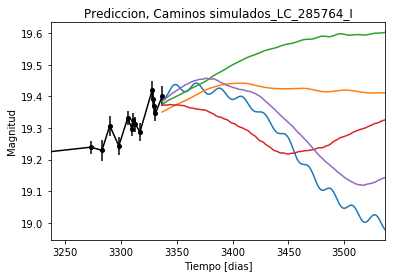

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_285764_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


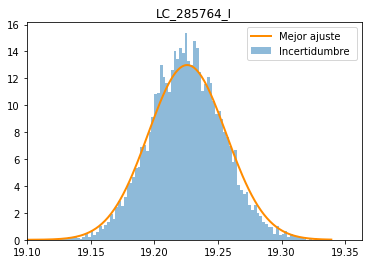

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_285764_I')
plt.savefig("Mejor_ajuste_LC_285764_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_285764_I')

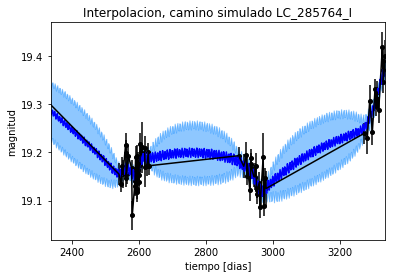

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_I')

Text(0.5,1,'Interpolacion, camino simulado LC_285764_I')

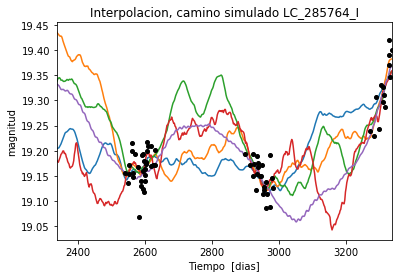

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_285764_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 601.428463126
Median: 0.0108005448367
Standard deviation: 0.217959257246
68% credibility interval: [ 0.00099588  0.19031778]
95% credibility interval: [  3.72486572e-04   8.74592857e-01]
99% credibility interval: [  3.12939251e-04   1.07063521e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 711.69941002
Median: 0.00338309814378
Standard deviation: 0.115858892734
68% credibility interval: [ 0.00063436  0.04481774]
95% credibility interval: [  3.40734884e-04   3.54631804e-01]
99% credibility interval: [  3.08265338e-04   8.68247329e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 686.038497662
Median: 0.0170695632552
S

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 849.482530822
Median: 258.353909965
Standard deviation: 1.7157147366
68% credibility interval: [ 256.47088799  259.57648254]
95% credibility interval: [ 253.83995846  260.37604653]
99% credibility interval: [ 251.67032045  261.58335194]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 4160.90955034
Median: 0.526391475162
Standard deviation: 2.51246381866
68% credibility interval: [ 0.0582993   3.98281279]
95% credibility interval: [ 0.01764258  8.41440782]
99% credibility interval: [  1.07961603e-02   1.30822033e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 317.281453581
Median: 1.05543194473
Standard deviation: 13.4230701795
68% credibility interval: [  0.03413591  14.59677837]
95% credibility interval: [  2.

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 20038.0102961
Median: 2.30882432091e-25
Standard deviation: 4.92133890379e+23
68% credibility interval: [  2.19673142e-93   5.24630577e-07]
95% credibility interval: [  2.03679769e-153   2.13054268e+001]
99% credibility interval: [  3.16338332e-164   2.29888451e+010]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1685.48513424
Median: 19.2925138183
Standard deviation: 0.0479044770733
68% credibility interval: [ 19.25209537  19.3339901 ]
95% credibility interval: [ 19.1985513   19.39150361]
99% credibility interval: [ 19.15304989  19.44900775]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 269.121575778
Median: 0.0506175285855
Standard deviation: 0.298798311157
68% credibility interval: [ 0.          0.53985723]
95% credibility interval: [ 0.          1.01728309]
99% credibility interval: [ 0.         1.1334592]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 269.121575778
Median: 0.0506175285855
Standard deviation: 0.298798311157
68% credibility interval: [ 0.          0.53985723]
95% credibility interval: [ 0.          1.01728309]
99% credibility interval: [ 0.         1.1334592]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 1757.20030694
Median: 0.0
Standard deviation: 0.000701006355443
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 849.482530822
Median: 258.353909965
Standard deviation: 1.7157147366
68% credibility interval: [ 256.47088799  259.57648254]
95% credibility interval: [ 253.83995846  260.37604653]
99% credibility interval: [ 251.67032045  261.58335194]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1456.42300471
Median: 0.0113250631093
Standard deviation: 0.0122171682853
68% credibility interval: [ 0.00705825  0.02004284]
95% credibility interval: [ 0.00471566  0.04284017]
99% credibility interval: [ 0.00376395  0.07858403]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1919.79070011
Median: 1.19949226184
Standard deviation: 0.161806828444
68% credibility interval: [ 1.0556329  1.3695545]
95% credibility interval: [ 0.92755151  1.566489  ]
99% credibility interval: [ 0.83994303  1.7177916 ]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 546.121382402
Median: 0.000505723213754
Standard deviation: 0.174930918023
68% credibility interval: [  6.84962775e-06   1.29176504e-02]
95% credibility interval: [  4.50462714e-08   3.56149301e-01]
99% credibility interval: [  2.60611484e-15   1.22894425e+00]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 601.428463126
Median: (-0.0678618246278-1.31851669963j)
Standard deviation: 2.32381609093
68% credibility interval: [-1.19580188+0.j         -0.00625732-0.11759673j]
95% credibility interval: [ -5.49522899e+00+0.j          -2.34040216e-03-6.72949401j]
99% credibility interval: [ -6.72699943e+00+0.j          -1.96625530e-03-3.30621556j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 711.69941002
Median: (-0.0212566325498+0.460292995936j)
Standard deviation: 2.01359879369
68% credibility interval: [-0.28159819+0.j -0.00398580+0.j]
95% credibility interval: [ -2.22821734e+00+6.51691089j  -2.14090042e-03+0.58534489j]
99% credibility interval: [ -5.45535886e+00+5.95823684j  -1.93688824e-03+0.00684669j]
Posterior summary fo